In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
series=pd.read_excel(r'C:\Users\Ronny\Desktop\ogauge_new\Range 69 for 7 bar.xlsx', header=0, index_col=0)
print(series)

          7.011
16:08:09       
16:08:10  7.009
16:08:11  7.011
16:08:12  7.009
16:08:13  7.009
16:08:14  7.011
...         ...
16:59:52  6.948
16:59:56  6.950
16:59:58  6.947
16:59:59  6.947
17:00:00  6.946

[2366 rows x 1 columns]


In [2]:
series.describe()

,7.011
count,2366.000000
mean,6.993311
std,0.038353
min,6.902000
25%,6.962000
50%,7.006000
75%,7.024000
max,7.047000


          7.011
16:08:09       
16:08:10  7.009
16:08:11  7.011
16:08:12  7.009
16:08:13  7.009
16:08:14  7.011


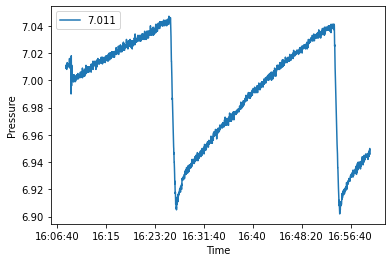

In [3]:
from matplotlib import pyplot
print(series.head())
series.plot()
pyplot.xlabel('Time')
pyplot.ylabel('Pressure')
pyplot.show()

In [4]:
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
values=DataFrame(series.values)
dataframe=concat([values.shift(1),values], axis=1)
dataframe.columns=['t-1','t+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.998332
t+1  0.998332  1.000000


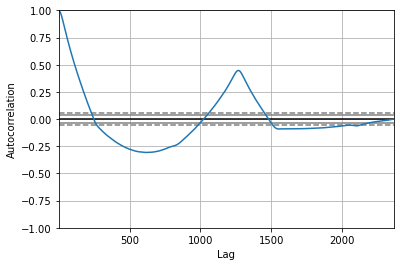

In [5]:
from pandas.plotting import autocorrelation_plot
series=pd.read_excel(r'C:\Users\Ronny\Desktop\ogauge_new\Range 69 for 7 bar.xlsx', header=0, index_col=0)
autocorrelation_plot(series)
pyplot.show()

Text(0.5, 0, 'Lag')

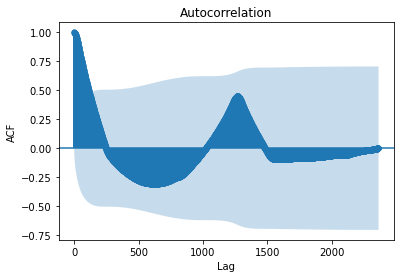

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf
acf_plot = plot_acf( series,lags=2365)
pyplot.ylabel('ACF')
pyplot.xlabel('Lag')

# PDF 

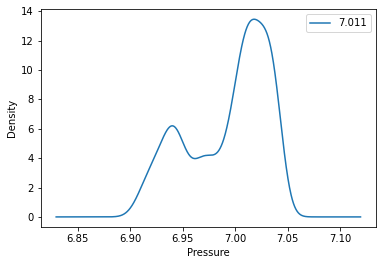

In [27]:
series=pd.read_excel(r'C:\Users\Ronny\Desktop\ogauge_new\Range 69 for 7 bar.xlsx', header=0, index_col=0)
series.plot(kind='kde')
pyplot.xlabel('Pressure')
pyplot.show()

C:\Users\Ronny\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


Coefficients: [ 0.86265356  0.46619667 -0.29975435  0.13036469  0.15685165  0.20841601
  0.2031575  -0.01042557  0.13857097 -0.00366535 -0.11286144]
predicted=7.008136, expected=7.008000
predicted=7.007012, expected=7.005000
predicted=7.006919, expected=7.008000
predicted=7.007887, expected=7.006000
predicted=7.007047, expected=7.008000
predicted=7.007393, expected=7.006000
predicted=7.007314, expected=7.006000
predicted=7.006585, expected=7.006000
predicted=7.006953, expected=7.009000
predicted=7.007027, expected=7.009000
predicted=7.006712, expected=7.010000
predicted=7.006800, expected=7.009000
predicted=7.006722, expected=7.007000
predicted=7.006501, expected=7.009000
predicted=7.006564, expected=7.008000
predicted=7.006468, expected=7.008000
predicted=7.006380, expected=7.006000
predicted=7.006437, expected=7.007000
predicted=7.006339, expected=7.009000
predicted=7.006224, expected=7.010000
predicted=7.006213, expected=7.008000
predicted=7.006160, expected=7.010000
predicted=7.006

predicted=7.004945, expected=6.980000
predicted=7.004945, expected=6.982000
predicted=7.004945, expected=6.980000
predicted=7.004945, expected=6.983000
predicted=7.004945, expected=6.983000
predicted=7.004945, expected=6.983000
predicted=7.004945, expected=6.982000
predicted=7.004945, expected=6.981000
predicted=7.004945, expected=6.985000
predicted=7.004945, expected=6.983000
predicted=7.004945, expected=6.984000
predicted=7.004945, expected=6.983000
predicted=7.004945, expected=6.982000
predicted=7.004945, expected=6.983000
predicted=7.004945, expected=6.982000
predicted=7.004945, expected=6.982000
predicted=7.004945, expected=6.982000
predicted=7.004945, expected=6.982000
predicted=7.004945, expected=6.984000
predicted=7.004945, expected=6.985000
predicted=7.004945, expected=6.984000
predicted=7.004945, expected=6.985000
predicted=7.004945, expected=6.984000
predicted=7.004945, expected=6.984000
predicted=7.004945, expected=6.985000
predicted=7.004945, expected=6.987000
predicted=7.

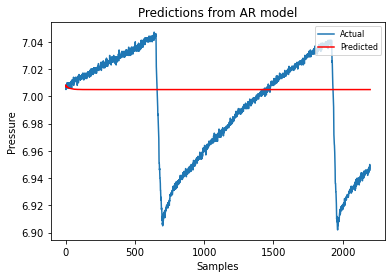

MAPE:  0.4787239305913125


In [28]:
# create and evaluate a static autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt
# load dataset
series=pd.read_excel(r'C:\Users\Ronny\Desktop\ogauge_new\Range 69 for 7 bar.xlsx', header=0, index_col=0)
# split dataset
X = series.values
train, test = X[1:len(X)-2200], X[len(X)-2200:]
# train autoregression
model = AutoReg(train, lags=10)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
mape = 100*(mean_absolute_percentage_error(test,predictions))
print('Test RMSE: %.3f' % rmse)
print('Test MAPE: %.3f' % mape)
# plot results
pyplot.title('Predictions from AR model')
pyplot.plot(test, label='Actual')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.xlabel('Samples')
pyplot.ylabel('Pressure')
pyplot.legend(loc='upper right', fontsize=8)
pyplot.show()
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
LR_MAPE= MAPE(test,predictions)
print("MAPE: ",LR_MAPE)

C:\Users\Ronny\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


Coefficients: [ 0.29890691  0.43304562 -0.23117194  0.12582638  0.13449081  0.23760783
  0.17412154  0.01196023  0.12888881  0.02510856 -0.08252686]
predicted=7.012840, expected=7.014000
predicted=7.014287, expected=7.013000
predicted=7.013503, expected=7.013000
predicted=7.013145, expected=7.015000
predicted=7.014209, expected=7.012000
predicted=7.012356, expected=7.013000
predicted=7.013244, expected=7.012000
predicted=7.012449, expected=7.015000
predicted=7.014376, expected=7.013000
predicted=7.012357, expected=7.014000
predicted=7.013127, expected=7.013000
predicted=7.012855, expected=7.014000
predicted=7.013591, expected=7.013000
predicted=7.012859, expected=7.013000
predicted=7.013150, expected=7.014000
predicted=7.013784, expected=7.013000
predicted=7.012960, expected=7.014000
predicted=7.013506, expected=7.013000
predicted=7.012750, expected=7.016000
predicted=7.014518, expected=7.013000
predicted=7.012450, expected=7.016000
predicted=7.014653, expected=7.013000
predicted=7.012

predicted=6.971817, expected=6.971000
predicted=6.972109, expected=6.970000
predicted=6.972066, expected=6.967000
predicted=6.970982, expected=6.970000
predicted=6.972264, expected=6.972000
predicted=6.972533, expected=6.971000
predicted=6.971306, expected=6.971000
predicted=6.971206, expected=6.970000
predicted=6.971496, expected=6.971000
predicted=6.972801, expected=6.972000
predicted=6.972529, expected=6.971000
predicted=6.972100, expected=6.970000
predicted=6.972490, expected=6.970000
predicted=6.972467, expected=6.967000
predicted=6.971117, expected=6.972000
predicted=6.973743, expected=6.972000
predicted=6.971914, expected=6.971000
predicted=6.971757, expected=6.973000
predicted=6.972616, expected=6.972000
predicted=6.972024, expected=6.971000
predicted=6.972831, expected=6.973000
predicted=6.973589, expected=6.971000
predicted=6.972871, expected=6.972000
predicted=6.974355, expected=6.973000
predicted=6.973645, expected=6.976000
predicted=6.975092, expected=6.970000
predicted=6.

predicted=7.035735, expected=7.038000
predicted=7.036607, expected=7.038000
predicted=7.036214, expected=7.037000
predicted=7.035930, expected=7.039000
predicted=7.037215, expected=7.037000
predicted=7.035733, expected=7.039000
predicted=7.037362, expected=7.040000
predicted=7.037103, expected=7.038000
predicted=7.036310, expected=7.039000
predicted=7.037569, expected=7.040000
predicted=7.037594, expected=7.039000
predicted=7.037581, expected=7.038000
predicted=7.037237, expected=7.037000
predicted=7.036988, expected=7.039000
predicted=7.038557, expected=7.039000
predicted=7.037385, expected=7.040000
predicted=7.037531, expected=7.040000
predicted=7.037464, expected=7.036000
predicted=7.035961, expected=7.038000
predicted=7.037986, expected=7.038000
predicted=7.037210, expected=7.038000
predicted=7.037413, expected=7.040000
predicted=7.037743, expected=7.040000
predicted=7.037023, expected=7.041000
predicted=7.038033, expected=7.035000
predicted=7.034898, expected=7.040000
predicted=7.

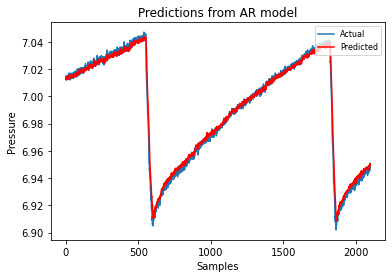

MSE=0.000013
R2=0.992
Test RMSE: 0.004
Test MAPE: 0.228


In [29]:
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error,r2_score
from math import sqrt
import numpy as np

# load dataset
series=pd.read_excel(r'C:\Users\Ronny\Desktop\ogauge_new\Range 69 for 7 bar.xlsx', header=0, index_col=0)
# split dataset
X = series.values
train, test = X[1:len(X)-2100], X[len(X)-2100:]
# train autoregression
window = 10
model = AutoReg(train, lags=10)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
mape = mean_absolute_error(test, predictions)*100
print('Test RMSE: %.3f' % rmse)
print('Test MAPE: %.3f' % mape)
# plot results
pyplot.title('Predictions from AR model')
pyplot.plot(test, label='Actual')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.xlabel('Samples')
pyplot.ylabel('Pressure')
pyplot.legend(loc='upper right', fontsize=8)
pyplot.show()
#mape = mean_squared_error(test, predictions)*100
MSE = np.square(np.subtract(test,predictions)).mean()
R2 = r2_score(test,predictions)
print('MSE=%f'%MSE)
print('R2=%.3f'%R2)
rmse = sqrt(mean_squared_error(test, predictions))
mape = mean_absolute_error(test, predictions)*100
print('Test RMSE: %.3f' % rmse)
print('Test MAPE: %.3f' % mape)

In [30]:
R2 = r2_score(test,predictions)
R2

0.9922125629737443

In [9]:
mean = series.mean()

Variance = series.var()

SD = series.std()
print("Mean:",mean)

print("Variance:",Variance)

print("SD:",SD)

Mean: 7.011    6.993311
dtype: float64
Variance: 7.011    0.001471
dtype: float64
SD: 7.011    0.038353
dtype: float64
